# UCI Heart Disease Dataset

## Column Descriptions:

1. id: (Unique id for each patient)
2. age: (Age of the patient in years)
3. origin: (place of study)
4. sex: (Male/Female)
5. cp: chest pain type: 
    * typical angina
    * atypical angina
    * non-anginal 
    * asymptomatic
6. trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol: (serum cholesterol in mg/dl)
8. fbs: (if fasting blood sugar > 120 mg/dl)
9. restecg: (resting electrocardiographic results)
--Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

### About Dataset
. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia.  This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Import Libraries

In [293]:
# To handle Data
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, precision_score, mean_squared_error, r2_score

# For Classification Tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')


### Import Dataset

In [294]:
df = pd.read_csv("C:\\Users\\osman\\Desktop\\Learnings\\Excel Data\\heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Exploratory Data Analysis

### Explore Each Column 

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [296]:
df.shape

(920, 16)

In [297]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [298]:
df["id"].min(), df["id"].max()

(1, 920)

#### Explore Age Column

In [299]:
df["age"].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [300]:
df["age"].min(), df["age"].max()

(28, 77)

Mean :  53.51086956521739
Median :  54.0
Mode :  54


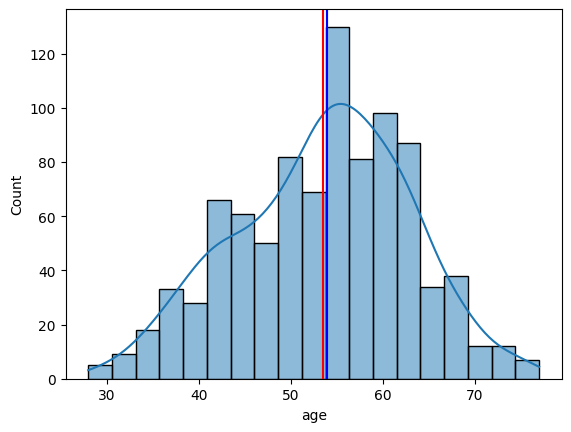

In [301]:
sns.histplot(df["age"], kde = True)
plt.axvline(df["age"].mean(), color="Red")
plt.axvline(df["age"].median(), color="Green")
plt.axvline(df["age"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["age"].mean())
print("Median : ", df["age"].median())
print("Mode : ", df["age"].mode()[0])

In [302]:
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [303]:
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [304]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [305]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [306]:
male_count= 726
female_count= 194
total_count=male_count+female_count

## For Percentage
male_percentage =(male_count/total_count) * 100
female_percentage =(female_count/total_count) * 100

## Display the Result
print(f"Male percentage in the data : ,{male_percentage:.2f}%")
print(f"Female percentage in the data : ,{female_percentage:.2f}%")

## Difference
difference_percentage = ((male_count - female_count) / female_count * 100)
print(f"Male are : {difference_percentage:.2f} more than female in the data")


Male percentage in the data : ,78.91%
Female percentage in the data : ,21.09%
Male are : 274.23 more than female in the data


#### Explore Dataset Column

In [307]:
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [308]:
df["dataset"].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

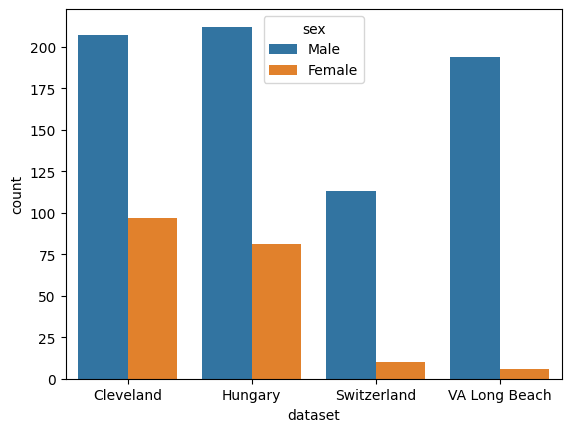

In [309]:
## via Seaborn
sns.countplot(data=df, x='dataset', hue='sex')

## via Plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [310]:
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [311]:
fig =px.histogram(data_frame=df, x="age", color='dataset')
fig.show()

In [312]:
## Find mean median mode of each country

print("Mean:")
print(df.groupby('dataset')['age'].mean())
print("----------")

print("Median:")
print(df.groupby('dataset')['age'].median())
print("----------")

print("Mode:")
print(df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean:
dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------
Median:
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------
Mode:
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Explore CP (Chest Pain) Columns

In [313]:
df["cp"].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [314]:
df["cp"].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [315]:
fig = px.histogram(data_frame=df, x="age", color='cp')
fig.show()

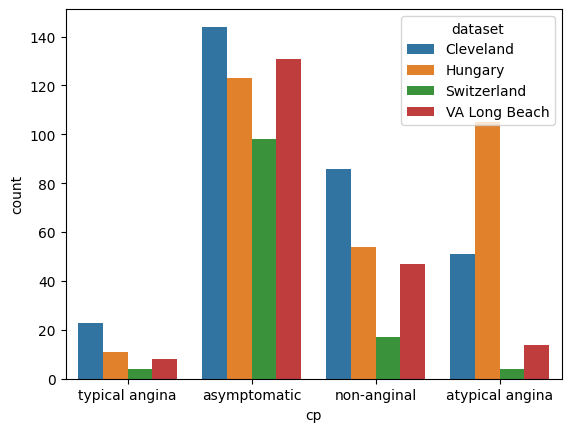

In [316]:
sns.countplot(data=df, x='cp', hue='dataset')


fig = px.histogram(data_frame=df, x="dataset", color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

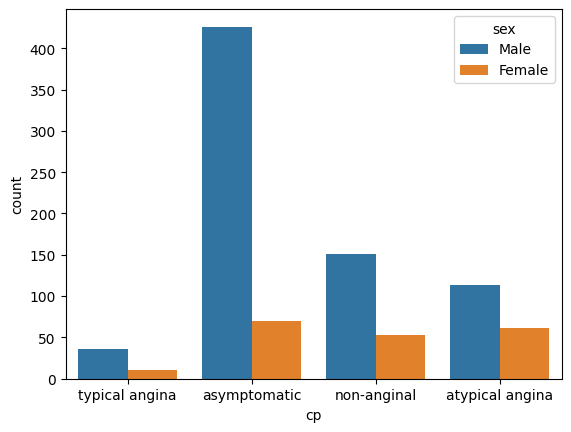

In [317]:
sns.countplot(data=df, x='cp', hue='sex')

In [318]:
df.groupby('sex')['cp'].value_counts()

sex     cp             
Female  asymptomatic        70
        atypical angina     61
        non-anginal         53
        typical angina      10
Male    asymptomatic       426
        non-anginal        151
        atypical angina    113
        typical angina      36
Name: count, dtype: int64

In [319]:
df.groupby('dataset')['cp'].value_counts()

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64

In [320]:
print("Mean:")
print(df.groupby('cp')['age'].mean())
print("----------")

print("Median:")
print(df.groupby('cp')['age'].median())
print("----------")

print("Mode:")
print(df.groupby('cp')['age'].agg(pd.Series.mode))

Mean:
cp
asymptomatic       54.959677
atypical angina    49.241379
non-anginal        53.333333
typical angina     54.826087
Name: age, dtype: float64
----------
Median:
cp
asymptomatic       56.0
atypical angina    50.5
non-anginal        53.5
typical angina     59.0
Name: age, dtype: float64
----------
Mode:
cp
asymptomatic             57
atypical angina          54
non-anginal        [51, 54]
typical angina           62
Name: age, dtype: object


#### Explore TRESTBPS Column:

\\ The Normal Blood Pressure is 120/80 mm Hg.

In [321]:
df['trestbps'].nunique()

61

In [322]:
df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

In [323]:
print("Minimum Count : ", df['trestbps'].min()) 
print("Maximum Count : ", df['trestbps'].max())

Minimum Count :  0.0
Maximum Count :  200.0


In [324]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

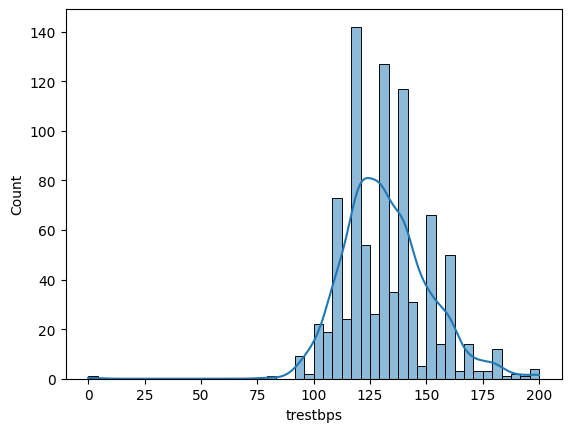

In [325]:
sns.histplot(df["trestbps"], kde=True)

#### Dealing With Missing Values

In [326]:
(f"Percentage of missing values in TRESTBPS column is : {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")

'Percentage of missing values in TRESTBPS column is : 6.41%'

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [328]:
df.isnull().sum() / len(df) * 100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

##### Imputing Numerical Columns

In [329]:
### Trestbps Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['trestbps']])
df['trestbps'] = imputer.transform(df[['trestbps']])
print(f"Percentage of missing values in TRESTBPS column is : {df['trestbps'].isnull().sum()}")

Percentage of missing values in TRESTBPS column is : 0


In [330]:
### chol Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['chol']])
df['chol'] = imputer.transform(df[['chol']])
print(f"Percentage of missing values in CHOL column is : {df['chol'].isnull().sum()}")

Percentage of missing values in CHOL column is : 0


In [331]:
### thalch Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['thalch']])
df['thalch'] = imputer.transform(df[['thalch']])
print(f"Percentage of missing values in THALCH column is : {df['thalch'].isnull().sum()}")

Percentage of missing values in THALCH column is : 0


In [332]:
### oldpeak Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['oldpeak']])
df['oldpeak'] = imputer.transform(df[['oldpeak']])
print(f"Percentage of missing values in OLDPEAK column is : {df['thalch'].isnull().sum()}")

Percentage of missing values in OLDPEAK column is : 0


In [333]:
### ca Column
# Imputing missing values 
## Imputer will be used only for numerical columns
imputer = IterativeImputer(max_iter= 10, random_state=42)
imputer.fit(df[['ca']])
df['ca'] = imputer.transform(df[['ca']])
print(f"Percentage of missing values in CA column is : {df['ca'].isnull().sum()}")

Percentage of missing values in CA column is : 0


##### Imputing Categorical Columns 

In [334]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [335]:
df["thal"].value_counts()


thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [336]:
df["fbs"].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [337]:
df["restecg"].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [338]:
df["exang"].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [339]:
df["slope"].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [340]:
df.isnull().sum() / len(df) * 100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
fbs          9.782609
restecg      0.217391
thalch       0.000000
exang        5.978261
oldpeak      0.000000
slope       33.586957
ca           0.000000
thal        52.826087
num          0.000000
dtype: float64

In [341]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [342]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [343]:
### Used this function only for categorical\cassifier columns, numerical\egressor columns have been imputed with using iterative imputer 

# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [344]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [345]:
##### We would run ths code two times because in first time it would give us the missing values in second time it would impute the missing values

# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 77.46 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 65.04 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [346]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 0.0%
The feature 'fbs' has been imputed with 77.17 accuracy

Missing Values restecg : 0.0%
The feature 'restecg' has been imputed with 63.59 accuracy

Missing Values exang : 0.0%
The feature 'exang' has been imputed with 82.61 accuracy

Missing Values slope : 0.0%
The feature 'slope' has been imputed with 82.07 accuracy

Missing Values thal : 0.0%
The feature 'thal' has been imputed with 81.52 accuracy



In [347]:
df.isnull().sum() / len(df) * 100

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [348]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,fixed defect,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,True,0.878788,flat,0.676375,reversable defect,0
919,920,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,flat,0.676375,reversable defect,1


#### Dealing with Outliers

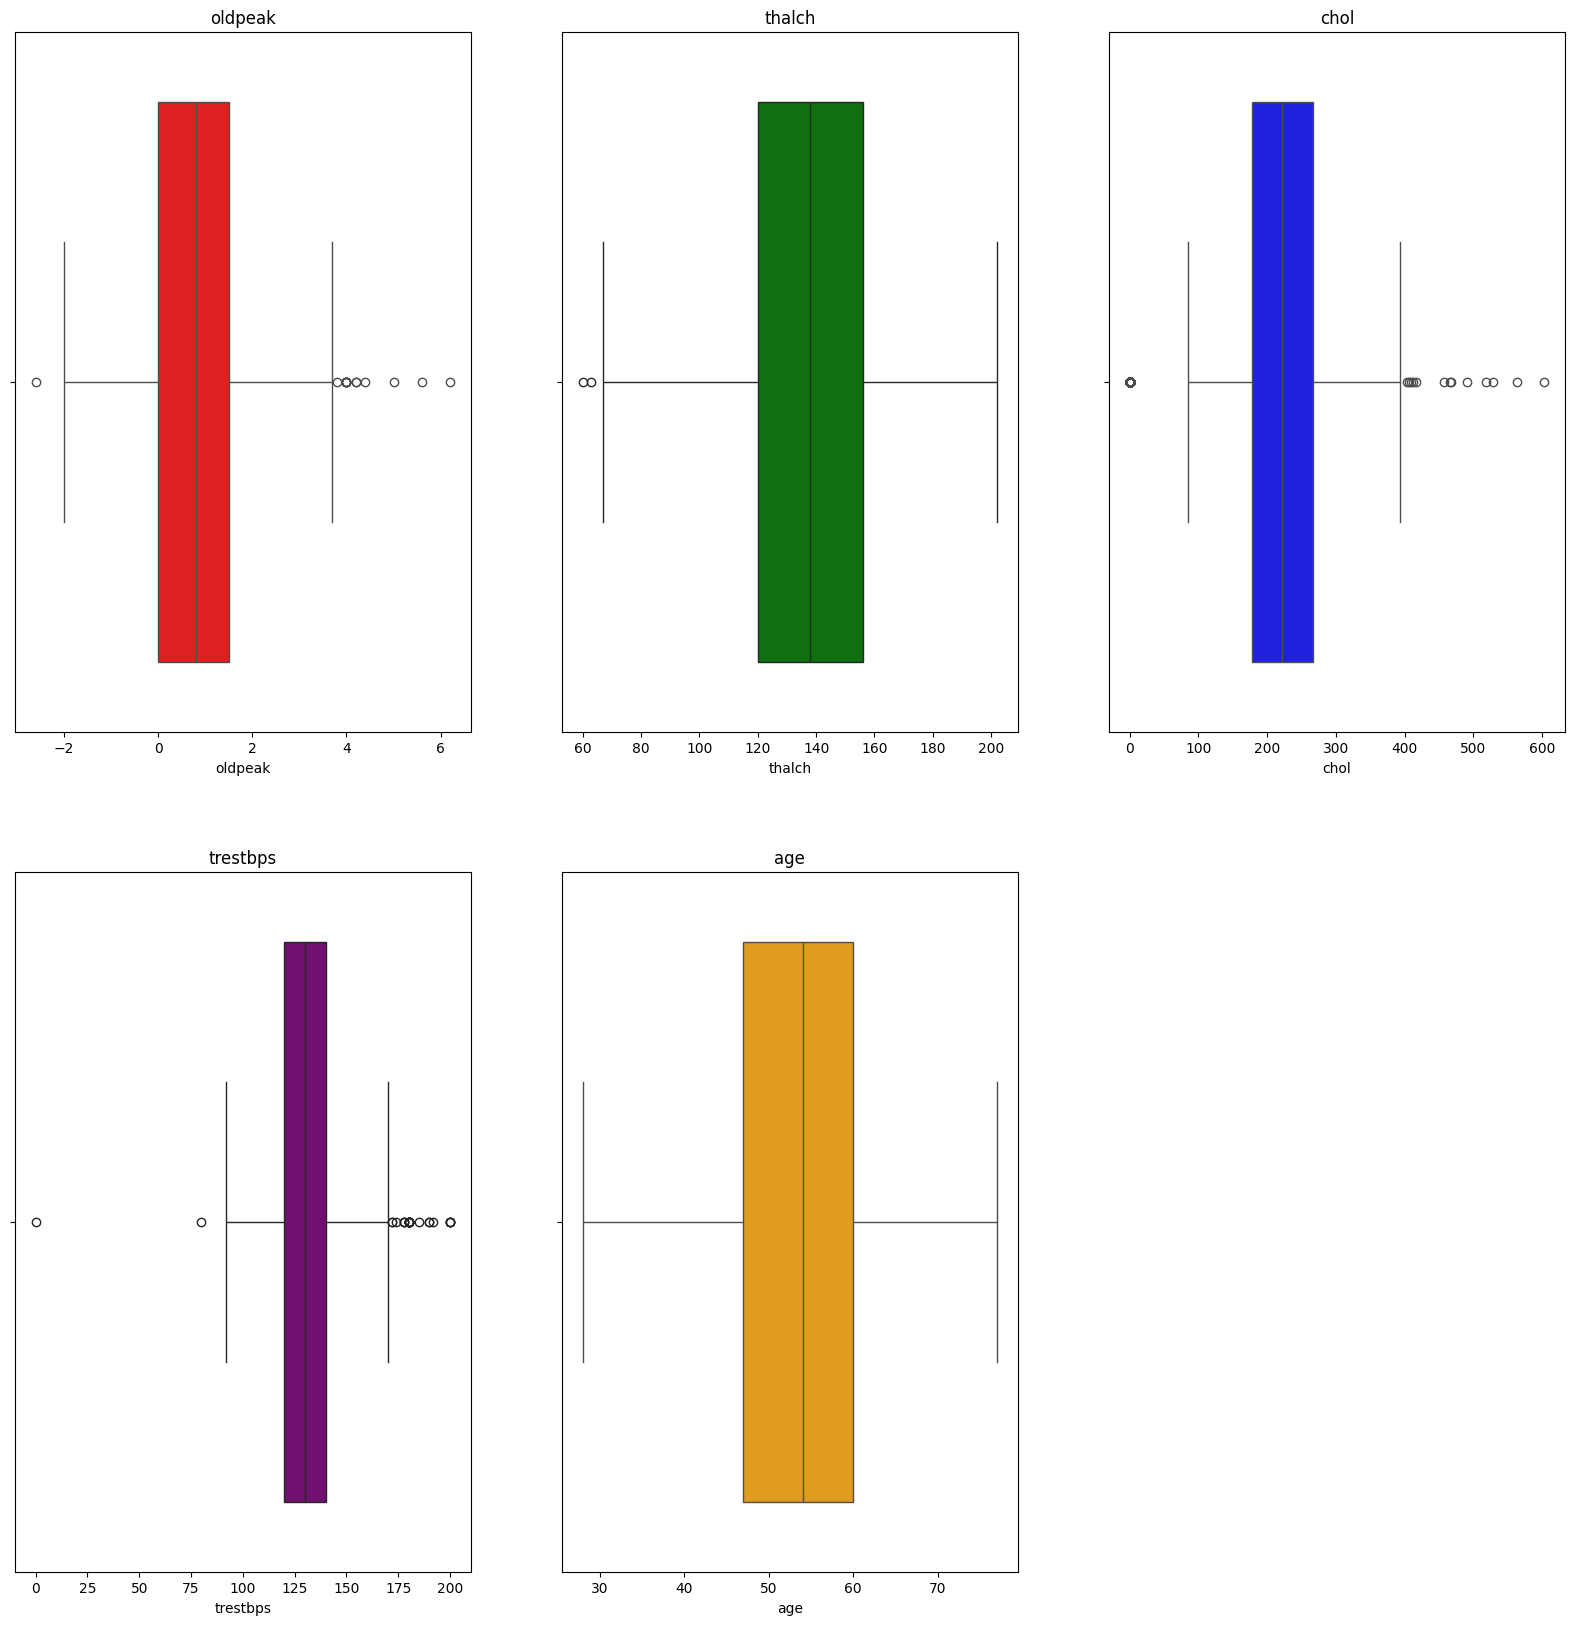

In [349]:
plt.figure(figsize = (20,20))

colors = ['red', 'green', 'blue', 'purple', 'orange']

for i, col in enumerate(numerical_cols):  
    plt.subplot(2,3, i+1)  # used to define how many plots will come in one row 
    sns.boxplot(x=df[col], color = colors[i])
    plt.title(col)

plt.show()

In [350]:
fig = px.box(data_frame= df, y='age')
fig.show()

fig = px.box(data_frame= df, y='trestbps')
fig.show()

fig = px.box(data_frame= df, y='oldpeak')
fig.show()

fig = px.box(data_frame= df, y='chol')
fig.show()

fig = px.box(data_frame= df, y='thalch')
fig.show()

In [351]:
# calling the row which has trestbps == 0
df[df['trestbps'] == 0 ]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.676375,reversable defect,3


In [352]:
df = df[df['trestbps'] != 0 ]

In [353]:
fig = px.box(data_frame= df, y='trestbps')
fig.show()


In [354]:
df[df['chol'] == 0 ]
### Chol  do not have outliers

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,False,normal,127.000000,False,0.700000,upsloping,0.676375,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,False,normal,154.000000,False,0.200000,upsloping,0.676375,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,False,normal,130.000000,True,0.878788,flat,0.676375,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,False,normal,125.000000,True,1.000000,flat,0.676375,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,False,normal,166.000000,False,2.800000,upsloping,0.676375,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,False,normal,120.000000,False,0.500000,upsloping,0.676375,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,True,st-t abnormality,160.000000,False,3.000000,flat,0.676375,fixed defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,False,st-t abnormality,110.000000,True,1.000000,downsloping,0.676375,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,False,lv hypertrophy,137.545665,True,0.878788,flat,0.676375,reversable defect,1


#### Continue EDA

#### Explore TRESTBPS column

In [355]:
df['trestbps'].nunique()

61

In [356]:
df.groupby('sex')['trestbps'].value_counts()

sex     trestbps
Female  120.0       32
        130.0       30
        140.0       18
        150.0       13
        110.0       11
                    ..
Male    98.0         1
        101.0        1
        114.0        1
        117.0        1
        102.0        1
Name: count, Length: 99, dtype: int64

Mean :  132.27618264057662
Median :  130.0
Mode :  120.0


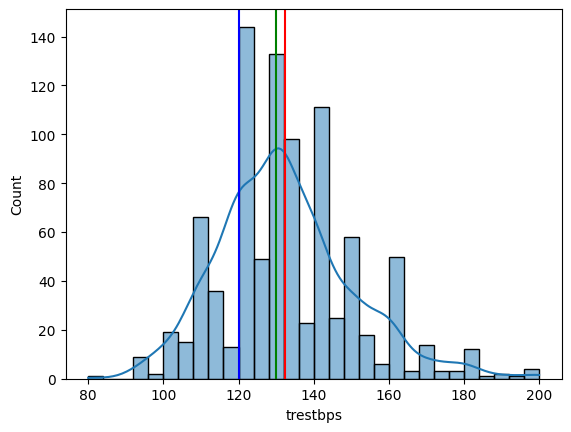

In [357]:
sns.histplot(df["trestbps"], kde = True)
plt.axvline(df["trestbps"].mean(), color="Red")
plt.axvline(df["trestbps"].median(), color="Green")
plt.axvline(df["trestbps"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["trestbps"].mean())
print("Median : ", df["trestbps"].median())
print("Mode : ", df["trestbps"].mode()[0])

In [358]:
fig = px.bar(df, x='sex', color='trestbps')
fig.show()

fig = px.bar(df, x='dataset', color='trestbps')
fig.show()


#### Explore Chol Column

In [359]:
df.groupby('sex')['chol'].value_counts()

sex     chol      
Female  0.000000      11
        199.130337     7
        294.000000     4
        269.000000     4
        308.000000     3
                      ..
Male    205.000000     1
        242.000000     1
        251.000000     1
        153.000000     1
        603.000000     1
Name: count, Length: 321, dtype: int64

In [360]:
df.groupby('dataset')['chol'].value_counts()

dataset        chol 
Cleveland      197.0    6
               204.0    6
               234.0    6
               269.0    5
               254.0    5
                       ..
VA Long Beach  192.0    1
               272.0    1
               193.0    1
               271.0    1
               458.0    1
Name: count, Length: 407, dtype: int64

Mean :  199.34701862063065
Median :  221.0
Mode :  0.0


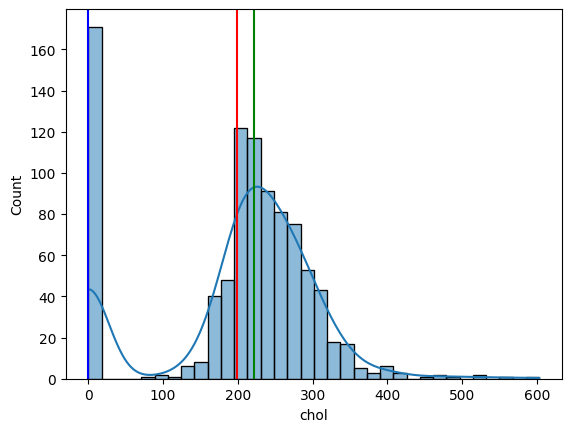

In [361]:
sns.histplot(df["chol"], kde = True)
plt.axvline(df["chol"].mean(), color="Red")
plt.axvline(df["chol"].median(), color="Green")
plt.axvline(df["chol"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["chol"].mean())
print("Median : ", df["chol"].median())
print("Mode : ", df["chol"].mode()[0])

In [362]:
fig = px.bar(df, x='sex', color='chol')
fig.show()

fig = px.bar(df, x='dataset', color='chol')
fig.show()

#### FBS Column

In [363]:
df.groupby('sex')['fbs'].value_counts()

sex     fbs  
Female  False    175
        True      19
Male    False    606
        True     119
Name: count, dtype: int64

In [364]:
print("Mode : ", df["fbs"].mode()[0])

Mode :  False


In [365]:
fig = px.bar(df, x='sex', color='fbs')
fig.show()

fig = px.bar(df, x='dataset', color='fbs')
fig.show()

In [366]:
df.groupby('sex')['fbs'].value_counts()

sex     fbs  
Female  False    175
        True      19
Male    False    606
        True     119
Name: count, dtype: int64

In [367]:
df.groupby('dataset')['fbs'].value_counts()

dataset        fbs  
Cleveland      False    259
               True      45
Hungary        False    273
               True      20
Switzerland    False    118
               True       5
VA Long Beach  False    131
               True      68
Name: count, dtype: int64

#### RESTECG Column

In [368]:
df.groupby('sex')['restecg'].value_counts()

sex     restecg         
Female  normal              119
        lv hypertrophy       47
        st-t abnormality     28
Male    normal              433
        st-t abnormality    151
        lv hypertrophy      141
Name: count, dtype: int64

In [369]:
fig = px.histogram(data_frame=df, x="age", color='restecg')
fig

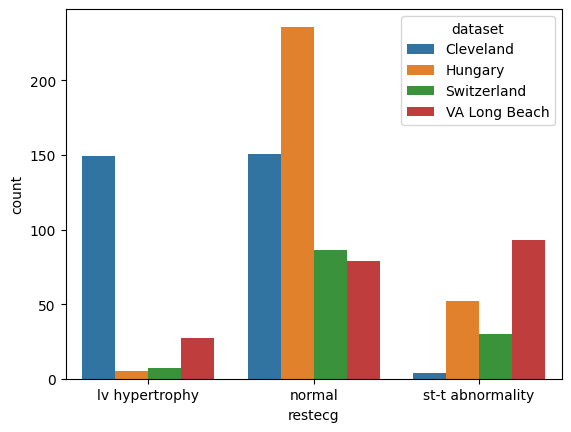

In [370]:
sns.countplot(data=df, x='restecg', hue='dataset')


fig = px.histogram(data_frame=df, x="dataset", color='restecg')
fig.show()

<Axes: xlabel='restecg', ylabel='count'>

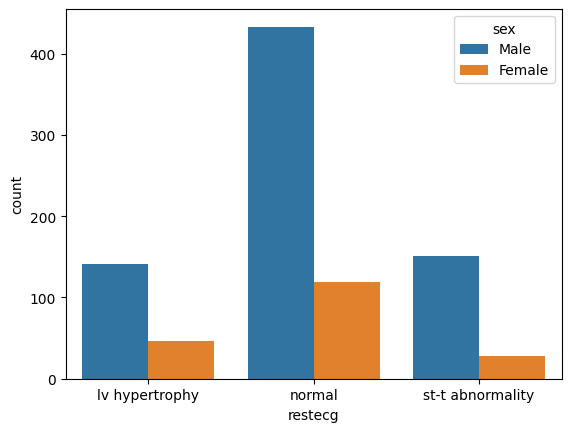

In [371]:
sns.countplot(data=df, x='restecg', hue='sex')

In [372]:
df.groupby('dataset')['restecg'].value_counts()

dataset        restecg         
Cleveland      normal              151
               lv hypertrophy      149
               st-t abnormality      4
Hungary        normal              236
               st-t abnormality     52
               lv hypertrophy        5
Switzerland    normal               86
               st-t abnormality     30
               lv hypertrophy        7
VA Long Beach  st-t abnormality     93
               normal               79
               lv hypertrophy       27
Name: count, dtype: int64

In [373]:
print("Mean:")
print(df.groupby('restecg')['age'].mean())
print("----------")

print("Median:")
print(df.groupby('restecg')['age'].median())
print("----------")

print("Mode:")
print(df.groupby('restecg')['age'].agg(pd.Series.mode))

Mean:
restecg
lv hypertrophy      56.218085
normal              51.730072
st-t abnormality    56.150838
Name: age, dtype: float64
----------
Median:
restecg
lv hypertrophy      57.0
normal              52.0
st-t abnormality    57.0
Name: age, dtype: float64
----------
Mode:
restecg
lv hypertrophy      58
normal              54
st-t abnormality    55
Name: age, dtype: int64


#### EXANG Column

In [374]:
df.groupby('sex')['exang'].value_counts()

sex     exang
Female  False    151
        True      43
Male    False    395
        True     330
Name: count, dtype: int64

In [375]:
df.groupby('dataset')['exang'].value_counts()

dataset        exang
Cleveland      False    205
               True      99
Hungary        False    204
               True      89
Switzerland    False     68
               True      55
VA Long Beach  True     130
               False     69
Name: count, dtype: int64

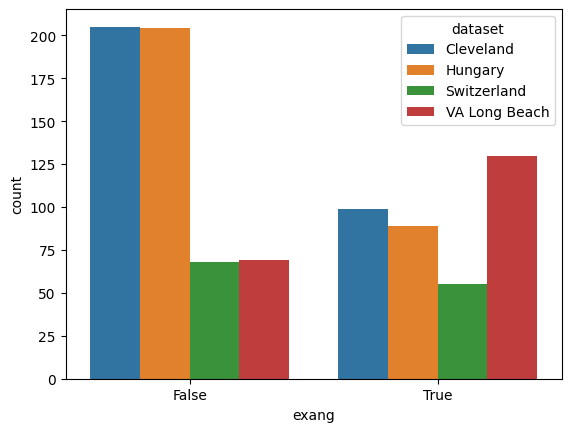

In [376]:
sns.countplot(data=df, x='exang', hue='dataset')
fig = px.histogram(data_frame=df, x="dataset", color='exang')
fig.show()

<Axes: xlabel='exang', ylabel='count'>

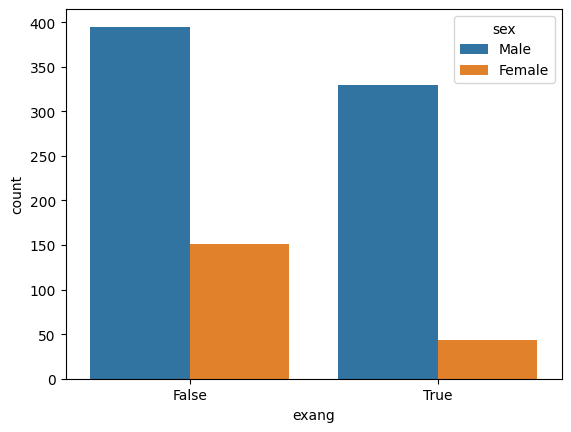

In [377]:
sns.countplot(data=df, x='exang', hue='sex')

#### THALCH Column

In [378]:
df.groupby('sex')['thalch'].value_counts()

sex     thalch
Female  150.0     9
        130.0     9
        160.0     9
        142.0     7
        140.0     7
                 ..
Male    69.0      1
        67.0      1
        63.0      1
        104.0     1
        202.0     1
Name: count, Length: 193, dtype: int64

In [379]:
df.groupby('dataset')['thalch'].value_counts()

dataset        thalch
Cleveland      162.0     11
               160.0      9
               163.0      9
               152.0      8
               125.0      7
                         ..
VA Long Beach  132.0      1
               131.0      1
               126.0      1
               124.0      1
               123.0      1
Name: count, Length: 290, dtype: int64

In [380]:
fig = px.bar(df, x='sex', color='thalch')
fig.show()

fig = px.bar(df, x='dataset', color='thalch')
fig.show()

In [381]:
fig = px.histogram(data_frame=df, x="dataset", color='thalch')
fig.show()

Mean :  137.52667199204967
Median :  138.0
Mode :  137.5456647398844


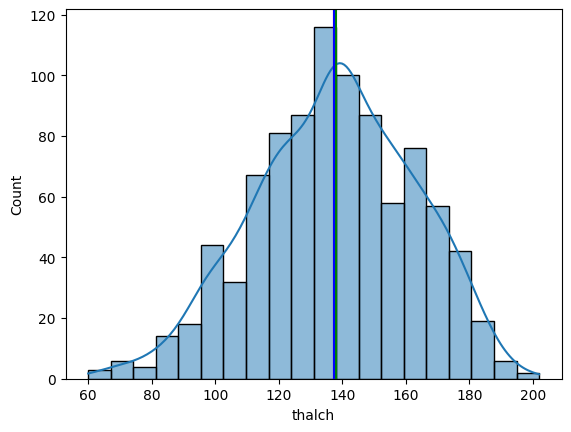

In [382]:
sns.histplot(df["thalch"], kde = True)
plt.axvline(df["thalch"].mean(), color="Red")
plt.axvline(df["thalch"].median(), color="Green")
plt.axvline(df["thalch"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["thalch"].mean())
print("Median : ", df["thalch"].median())
print("Mode : ", df["thalch"].mode()[0])

In [383]:
fig = px.histogram(data_frame=df, x="age", color='thalch')
fig

#### OLDPEAK Column

In [384]:
df.groupby('sex')['oldpeak'].value_counts()

sex     oldpeak
Female   0.0       99
         1.0       20
         2.0        9
         1.5        8
         0.6        6
                   ..
Male    -0.9        1
        -0.8        1
        -0.7        1
        -0.1        1
         5.6        1
Name: count, Length: 82, dtype: int64

In [385]:
df.groupby('dataset')['oldpeak'].value_counts()

dataset        oldpeak
Cleveland       0.0       100
                1.2        17
                1.0        14
                0.6        14
                0.8        13
                         ... 
VA Long Beach   1.7         1
                3.5         1
                1.6         1
               -0.5         1
                0.8         1
Name: count, Length: 101, dtype: int64

In [386]:
fig = px.bar(df, x='sex', color='oldpeak')
fig.show()

fig = px.bar(df, x='dataset', color='oldpeak')
fig.show()

Mean :  0.8781119134764401
Median :  0.8
Mode :  0.0


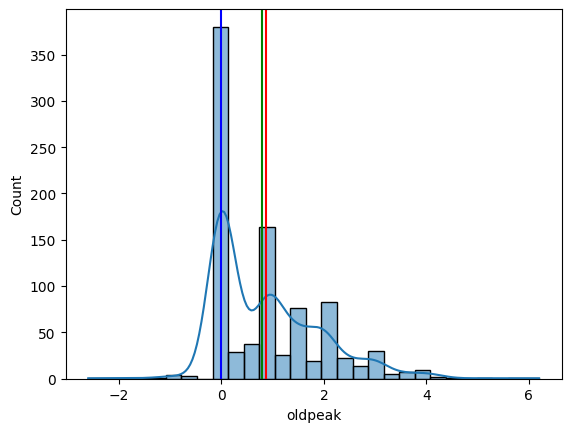

In [387]:
sns.histplot(df["oldpeak"], kde = True)
plt.axvline(df["oldpeak"].mean(), color="Red")
plt.axvline(df["oldpeak"].median(), color="Green")
plt.axvline(df["oldpeak"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["oldpeak"].mean())
print("Median : ", df["oldpeak"].median())
print("Mode : ", df["oldpeak"].mode()[0])

#### SLOPE Column

In [388]:
df.groupby('sex')['slope'].value_counts()

sex     slope      
Female  flat           103
        upsloping       84
        downsloping      7
Male    flat           452
        upsloping      214
        downsloping     59
Name: count, dtype: int64

In [389]:
df.groupby('dataset')['slope'].value_counts()

dataset        slope      
Cleveland      upsloping      143
               flat           140
               downsloping     21
Hungary        flat           186
               upsloping      106
               downsloping      1
Switzerland    flat            78
               upsloping       33
               downsloping     12
VA Long Beach  flat           151
               downsloping     32
               upsloping       16
Name: count, dtype: int64

In [390]:
fig = px.bar(df, x='sex', color='slope')
fig.show()

fig = px.bar(df, x='dataset', color='slope')
fig.show()

In [391]:
fig = px.histogram(data_frame=df, x="dataset", color='slope')
fig.show()

<Axes: xlabel='slope', ylabel='count'>

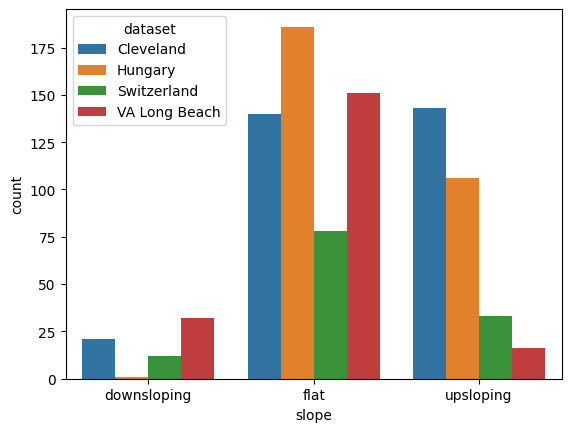

In [392]:
sns.countplot(data=df, x='slope', hue='dataset')

#### CA Column

In [393]:
df.groupby('sex')['ca'].value_counts()

sex     ca      
Female  0.676375     97
        0.000000     65
        1.000000     15
        2.000000     13
        3.000000      4
Male    0.676375    513
        0.000000    116
        1.000000     52
        2.000000     28
        3.000000     16
Name: count, dtype: int64

In [394]:
df.groupby('dataset')['ca'].value_counts()

dataset        ca      
Cleveland      0.000000    176
               1.000000     65
               2.000000     38
               3.000000     20
               0.676375      5
Hungary        0.676375    290
               0.000000      3
Switzerland    0.676375    118
               2.000000      3
               1.000000      2
VA Long Beach  0.676375    197
               0.000000      2
Name: count, dtype: int64

<Axes: xlabel='ca', ylabel='count'>

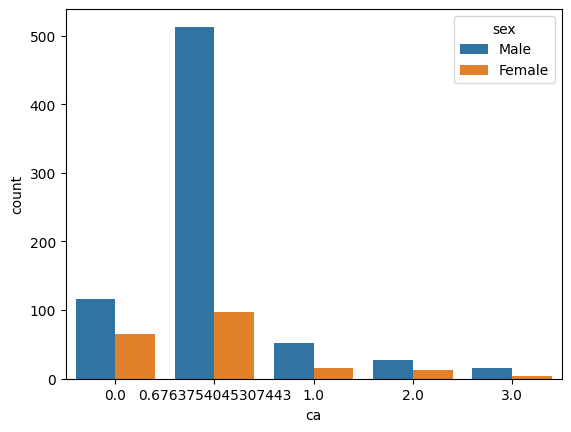

In [395]:
sns.countplot(data=df, x='ca', hue='sex')

<Axes: xlabel='ca', ylabel='count'>

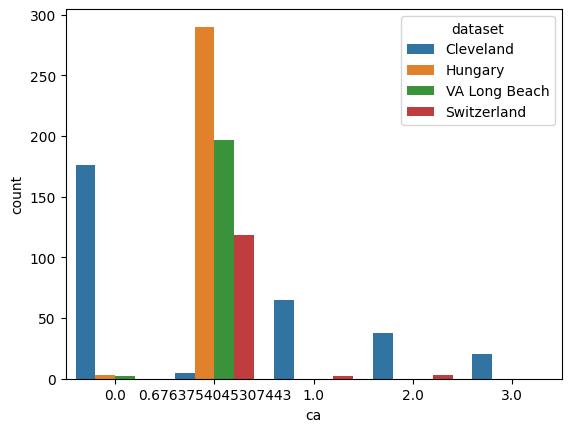

In [396]:
sns.countplot(data=df, x='ca', hue='dataset')

In [397]:
fig = px.bar(df, x='sex', color='ca')
fig.show()

fig = px.bar(df, x='dataset', color='ca')
fig.show()

#### THAL Column

In [398]:
df.groupby('sex')['thal'].value_counts()

sex     thal             
Female  normal               156
        reversable defect     34
        fixed defect           4
Male    reversable defect    457
        normal               192
        fixed defect          76
Name: count, dtype: int64

In [399]:
df.groupby('dataset')['thal'].value_counts()

dataset        thal             
Cleveland      normal               168
               reversable defect    118
               fixed defect          18
Hungary        normal               139
               reversable defect    134
               fixed defect          20
Switzerland    reversable defect     87
               normal                25
               fixed defect          11
VA Long Beach  reversable defect    152
               fixed defect          31
               normal                16
Name: count, dtype: int64

In [400]:
fig = px.bar(df, x='sex', color='thal')
fig.show()

fig = px.bar(df, x='dataset', color='thal')
fig.show()

<Axes: xlabel='thal', ylabel='count'>

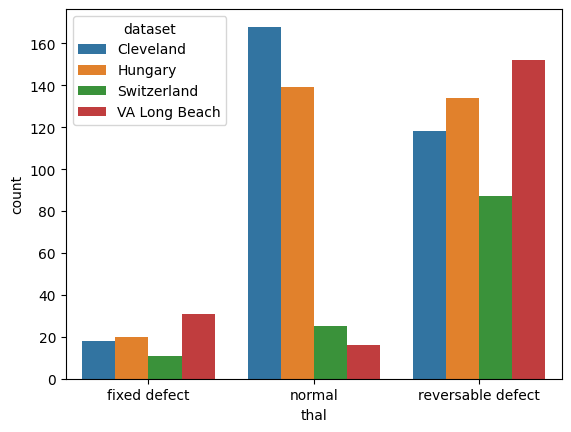

In [401]:
sns.countplot(data=df, x='thal', hue='dataset')

#### NUM Column
    0 = no heart disease
    1 = mild heart disease`
    2 = moderate heart disease
    3 = severe heart disease
    4 = critical heart disease

In [402]:
df.groupby('sex')['num'].value_counts()

sex     num
Female  0      144
        1       30
        2       10
        3        8
        4        2
Male    0      267
        1      235
        2       99
        3       98
        4       26
Name: count, dtype: int64

In [403]:
df.groupby('dataset')['num'].value_counts()

dataset        num
Cleveland      0      165
               1       55
               2       36
               3       35
               4       13
Hungary        0      187
               1      106
Switzerland    1       48
               2       32
               3       30
               0        8
               4        5
VA Long Beach  1       56
               0       51
               2       41
               3       41
               4       10
Name: count, dtype: int64

<Axes: xlabel='num', ylabel='count'>

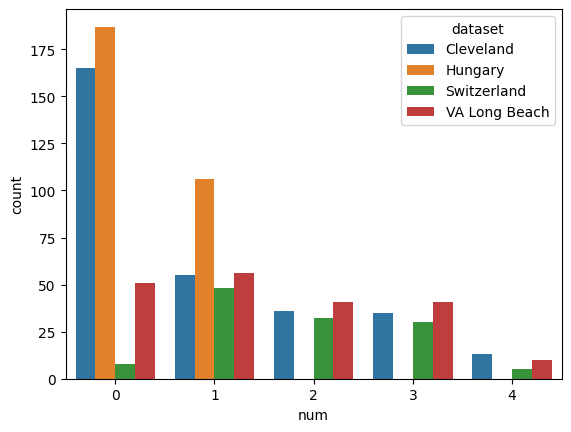

In [404]:
sns.countplot(data=df, x='num', hue='dataset')

In [405]:
fig = px.bar(df, x='sex', color='num')
fig.show()

fig = px.bar(df, x='dataset', color='num')
fig.show()

# Statistical Analysis

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


## Machine Learning

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [261]:
# spilit the num column from X to Y
X = df.drop('num', axis=1)
y = df['num']

# Encode X data using separate label encoder for all categorical columns, and save it for inverse transform
label_encoder = LabelEncoder()
for column in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

In [262]:
# spilit the num column from X to Y
X = df.drop('num', axis=1)
y = df['num']

# Spilit the data into train_test
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)

In [281]:
# spilit the num column from X to Y
X = df.drop('num', axis=1)
y = df['num']
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for 'thal' column
label_encoder_thal = LabelEncoder()

# Apply LabelEncoder to 'thal' column in the DataFrame
df['thal'] = label_encoder_thal.fit_transform(df['thal'])
df['sex'] = label_encoder_thal.fit_transform(df['sex'])
df['dataset'] = label_encoder_thal.fit_transform(df['dataset'])
df['cp'] = label_encoder_thal.fit_transform(df['cp'])
df['fbs'] = label_encoder_thal.fit_transform(df['fbs'])
df['restecg'] = label_encoder_thal.fit_transform(df['restecg'])
df['exang'] = label_encoder_thal.fit_transform(df['exang'])
df['slope'] = label_encoder_thal.fit_transform(df['slope'])


# Spilit the data into train_test
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state=42)

In [282]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


Enlist all Machine Learning Model
    1. Logistic Regression
    2.  KNN
    3.  NB
    4.  SVM
    5.  Decision Tree 
    6.  Random Forest
    7.  XGBoost
    8.  lightGB
    9. AdaBoost
    10. Gradient

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.pipeline import Pipeline


In [284]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6532097868217054
Test Accuracy: 0.644927536231884

Model: Gradient Boosting
Cross-validation Accuracy: 0.63453246124031
Test Accuracy: 0.6304347826086957

Model: Support Vector Machine
Cross-validation Accuracy: 0.5770106589147287
Test Accuracy: 0.5869565217391305

Model: Logistic Regression
Cross-validation Accuracy: 0.5256177325581396
Test Accuracy: 0.5108695652173914

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5769985465116279
Test Accuracy: 0.6014492753623188

Model: Decision Tree
Cross-validation Accuracy: 0.6159156976744186
Test Accuracy: 0.5905797101449275

Model: Ada Boost
Cross-validation Accuracy: 0.5909883720930232
Test Accuracy: 0.5942028985507246

Model: XG Boost
Cross-validation Accuracy: 0.6329336240310077
Test Accuracy: 0.6413043478260869

Model: Naive Bayes
Cross-validation Accuracy: 0.5863493217054263
Test Accuracy: 0.5507246376811594

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_sta

# Outputs:
      Age Column:
1. The Heart diseases starts from the age of 28.
2. The most of the people are effected by heart disease mostly at th age of 53-54.
3. Most of the males and females is affected by heart disease at the age of 54-55.
4. Male percentage in the data : ,78.91%
5. Female percentage in the data : ,21.09%
6. Male are : 274.23 more than female in the data
7. People mostly affected by heart disease are from Cleveland (304), Seconded by Hungary (293), Third is VA Long Beach (200), and least is Switzerland (123).
---------       -------------------------        -------------------------          ----------------------------------------------  
       Dataset Column:
1. The maximum count of male patients are in Hungary and the minimum are in Switzerland.
2. The maximum count of female patients are in Cleveland and the minimum are in VA Long Beach.
3. Male patients mostly affected by heart disease are from Hungary (212), Seconded by Cleveland (207), Third is VA Long Beach (194), and least is Switzerland (113).
4. Female patients mostly affected by heart disease are from Cleveland (97), Seconded by Hungary (81), Third is Switzerland (10), and least is VA Long Beach (06).
5. Males are more affected by heart disease according to dataset.
6. Mean of  Cleveland 54.351974, Hungary 47.894198, Switzerland 55.317073, VA Long Beach 59.350000 .
7. Median of Cleveland 55.5, Hungary 49.0, Switzerland 56.0, VA Long Beach 60.0 .
8. Mode of Cleveland 58, Hungary 54, Switzerland 61, VA Long Beach [62, 63].
---------       -------------------------        -------------------------          ----------------------------------------------  
       CP Column:
1. Female patients of asymptomatic are 70, atypical angina patients are 61, non-anginal patients are 53, typical angina patients are 10.
2. Male patients of asymptomatic are 426, non-anginal patients are 151, atypical angina paients  are 113, typical angina patients are 36.
3. Male are more afffected by all CP disease than Females.
4. Mean of each cp disease are:
       1. asymptomatic       54.959677
       2. atypical angina    49.241379
       3. non-anginal        53.333333
       4. typical angina     54.826087
5. Median of cp diseases are:
       1. asymptomatic       56.0
       2. atypical angina    50.5
       3. non-anginal        53.5
       4. typical angina     59.0
6. Mode are:
       1. asymptomatic             57
       2. atypical angina          54
       3. non-anginal        [51, 54]
       4.typical angina           62
7. From CP type Asymptomatic most patients are suffering in all countries.
---------       -------------------------        -------------------------          ---------------------------------------------- 
       How do we have Imputed Missing values?
1. We have used Iterative Imputer to impute numerical\regressor columns.
2. We have collected all the categorical values in one column named as "classifier_cols",
       1. Then defined a function we have used to iterative imputer to impute missing values.
       2. Used Raandom Forest to prdict missing values based on other features.
       3. Accuracy and error metrics are also used so, that we could know about the accuracy of the defined function.
---------       -------------------------        -------------------------          ---------------------------------------------- 
       Why do we used these steps?
1. For numerical columns we have used separate imputation because numerical columns are not relate with other featurs.
2. Categorical columns may  have relation between them and separate imputation could affect the other features.
---------       -------------------------        -------------------------          ---------------------------------------------- 
       Outliers Removal:
1. By using boxplots we knew the outliers.
2. We have not removed all the outliers because they are not false values, except one row in TRESTBPS column.
3. Row number 753 was removed because it has a false value in TRESTBPS column. 
---------       -------------------------        -------------------------          ---------------------------------------------- 
       TRESTBPS Column:
1. The average blood pressure is : 132.27618264057662 ,Median :  130.0 , the  most patients blood pressure level is : 120.0 .
2. Males are more affected by blood pressure disease than female.
3. Cleveland has the highest rate of blood pressure patients, Seconded by Hungary, Third most blood pressure patients are in VA Long Beach, Switzerland has the least patients.
---------       -------------------------        -------------------------          ---------------------------------------------- 
       Chol Column
1. The average choletrol level is :  199.34701862063065 ,Median :  221.0, most people cholestrol leverl is :  0.0 . 
2. Cleveland has the highest rate of blood pressure patients, Seconded by Hungary, Third most blood pressure patients are in VA Long Beach, Switzerland has the least patients.
3. Males are more affected by blood pressure disease than female.
---------       -------------------------        -------------------------          ----------------------------------------------  
       FBS Column
1. Fasting sugar level >120 is faced more by Males than females
2. VA Long Beach have the highest ratio of fbs disease, Clevland is second ,Hungary is third and Switzerland have least ratio 
3. According to this dataset many patients of heart disease do not face fbs problem 
Female = False    175 : True      19
Male   = False    606 : True     11
4. Count in Cleveland \ False : 259,
               True : 45,
5. Count in Hungary are \ False : 273
               True : 20
6. Count in Switzerland are \ False : 118
               True : 5
7. Count in VA Long Beach are \ False : 131
               True : 68
---------       -------------------------        -------------------------          ----------------------------------------------
       RESTECG Column
1. Female count of normal level is 119,
        lv hypertrophy : 47,
        st-t abnormality : 28.
2. Male count of normal level is 433,
        st-t abnormality : 151,
        lv hypertrophy : 141.

3. Count of patients in Cleveland : normal 151,
               lv hypertrophy : 149
               st-t abnormality : 4
4. Count of patients in Hungary :normal 236,
               st-t abnormality : 52,
               lv hypertrophy : 5.
5. Count of patients in Switzerland : normal 86,
               st-t abnormality : 30
               lv hypertrophy : 7.
6. Count of patient in VA Long Beach : st-t abnormality 93
               normal : 79
               lv hypertrophy : 27.
7. Males are more affected than females by restecg.
8. Mean of restecg, lv hypertrophy : 56.218085, normal : 51.730072, st-t abnormality : 56.150838.
9. Median of restecg, lv hypertrophy : 57.0, normal : 52.0, st-t abnormality : 57.0 .
10. Mode of restecg, lv hypertrophy : 58, normal : 54, st-t abnormality : 55.
---------       -------------------------        -------------------------          ----------------------------------------------
       EXANG Column
1. Exang patients count in Female are False : 151, True : 43.
2. Exang patients count in Male are False : 402, True : 323.
3. Cleveland  False : 205, True : 99, Hungary False : 204, True : 89, Switzerland  False : 68, True : 55, VA Long Beach  True : 123, False : 76.
---------       -------------------------        -------------------------          ----------------------------------------------
       THALCH Column
1. Mean Count of THALCH : 137.52667199204967, Median :  138.0, the most frequent value :  137.5456647398844
---------       -------------------------        -------------------------          ----------------------------------------------
       OLDPEAK Column

     ----------------------------------------------
       SLOPE Column
1. Types in Slope column flat, upsloping, downsloping.
2. Female  flat : 96, upsloping : 91, downsloping : 7.
3. Male  flat : 452, upsloping : 213, downsloping : 60.
4. Cleveland   upsloping : 143, flat : 140, downsloping : 21.
5. Hungary     flat : 181, upsloping : 111, downsloping : 1.
6. Switzerland flat : 78, upsloping : 33, downsloping : 12.
7. VA Long Beach flat : 149, downsloping : 33, upsloping : 17.
---------       -------------------------        -------------------------          ----------------------------------------------
       CA Column
1. Types in CA column \  0.676375, 0.000000, 1.000000, 2.000000, 3.000000 
2. Female   0.676375 : 97, 
        0.000000     65
        1.000000     15
        2.000000     13
        3.000000      4
Male    0.676375    513
        0.000000    116
        1.000000     52
        2.000000     28
        3.000000     16
3. Cleveland      0.000000    176
               1.000000     65
               2.000000     38
               3.000000     20
               0.676375      5
Hungary        0.676375    290
               0.000000      3
Switzerland    0.676375    118
               2.000000      3
               1.000000      2
VA Long Beach  0.676375    197
               0.000000      2
4. Males are mor affected than females 
---------       -------------------------        -------------------------          ----------------------------------------------
       THAL Column
1. Types in thal column :normal, reversable defect, fixed defect  
2. Female  normal               154
        reversable defect     36
        fixed defect           4
Male    reversable defect    453
        normal               187
        fixed defect          85
3. Cleveland      normal               168
               reversable defect    118
               fixed defect          18
Hungary        normal               134
               reversable defect    133
               fixed defect          26
Switzerland    reversable defect     85
               normal                26
               fixed defect          12
VA Long Beach  reversable defect    153
               fixed defect          33
---------       -------------------------        -------------------------          ----------------------------------------------
       NUM Column
1. Types in num column : 0, 1, 2, 3, 4
2. Female  0      144
        1       30
        2       10
        3        8
        4        2
Male    0      267
        1      235
        2       99
        3       98
        4       26
3. In Cleveland  all theparameters of heart disease are found such as: zero heart disease 165,  mild heart disease 55, moderate heart disease 36, severev heart disease 35, critical heart disease 13.
4. Hungary has the highest rate of no heart disease 0 : 187, and mild heart disease 1 : 106.
5. Patients in Switzerland face all the parameters of heart disease such as: zero heart disease 8,  mild heart disease 48, moderate heart disease 32, severe heart disease 30, critical heart disease 5.
6. Patients in VA Long Beach face all the parameters of heart disease such as: zero heart disease 51,  mild heart disease 56, moderate heart disease 41, severe heart disease 41, critical heart disease 10.